In [12]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from kan import KAN
import torch


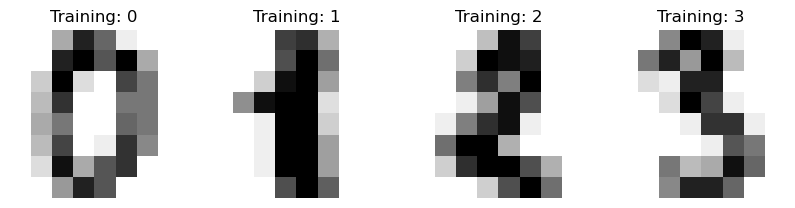

In [13]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [14]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

In [23]:
X_train.shape

(898, 64)

In [21]:
dataset = {}

dataset['train_input'] = torch.from_numpy(X_train)
dataset['test_input'] = torch.from_numpy(X_test)
dataset['train_label'] = torch.from_numpy(y_train)
dataset['test_label'] = torch.from_numpy(y_test)

In [24]:
model = KAN(width=[64,10], grid=3, k=3, seed=0)

In [ ]:
def train_acc():
    return torch.mean((torch.argmax(model(dataset['train_input']), dim=1) == dataset['train_label']).float())

def test_acc():
    return torch.mean((torch.argmax(model(dataset['test_input']), dim=1) == dataset['test_label']).float())

In [25]:
results = model.train(dataset, opt="LBFGS", steps=5, metrics=(train_acc, test_acc), loss_fn=torch.nn.CrossEntropyLoss());

train loss: 1.99e-09 | test loss: 2.36e+00 | reg: 4.73e+02 : 100%|████| 5/5 [00:28<00:00,  5.79s/it]


In [26]:
model(dataset['train_input'])

tensor([[ 265.5372, -260.9383,  -80.2340,  ...,   16.1031,   16.4655,
           29.4634],
        [-167.0447,  304.3463,    5.2271,  ...,   48.1922,  108.4397,
         -127.1035],
        [ -13.3801,  140.5070,  244.7325,  ...,  -42.8126,  129.2569,
         -119.6707],
        ...,
        [  48.6799, -147.4617,  -13.7002,  ...,  -37.2374,   85.2449,
          233.2837],
        [ -58.4228,  -31.5598,  101.2048,  ...,  114.3458,   -1.8122,
           34.1004],
        [ 104.9466,   84.5432,  -87.9219,  ...,   17.8372,   61.4531,
         -430.9725]], dtype=torch.float64, grad_fn=<AddBackward0>)

In [30]:
len(results)

5

In [54]:
train_acc()

tensor(1.)

In [61]:
dataset['train_label']

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3,
        4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1,
        0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5,
        0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6,
        8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9,
        5, 4, 8, 8, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3,
        4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9,
        8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7,
        3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1,
        7, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4,
        7, 2, 8, 2, 2, 5, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7,
        8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9,
        5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1,

In [59]:
torch.argmax(model(dataset['train_input']), dim=1)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3,
        4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1,
        0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5,
        0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6,
        8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9,
        5, 4, 8, 8, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3,
        4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9,
        8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7,
        3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1,
        7, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4,
        7, 2, 8, 2, 2, 5, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7,
        8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9,
        5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1,

In [58]:
torch.mean((torch.argmax(model(dataset['test_input']), dim=1) == dataset['test_label']).float())

tensor(0.9121)

In [55]:
test_acc()

tensor(0.9121)

In [56]:
dataset['test_input']

tensor([[ 0.,  0.,  1.,  ..., 12.,  1.,  0.],
        [ 0.,  0.,  6.,  ...,  6.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  2.,  0.,  0.],
        ...,
        [ 0.,  0.,  1.,  ...,  6.,  0.,  0.],
        [ 0.,  0.,  2.,  ..., 12.,  0.,  0.],
        [ 0.,  0., 10.,  ..., 12.,  1.,  0.]], dtype=torch.float64)

In [57]:
test_preds = model.forward(dataset['test_input']).detach()

In [42]:
dataset['test_label']

tensor([8, 8, 4, 9, 0, 8, 9, 8, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6,
        7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8,
        4, 1, 7, 7, 3, 5, 1, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6,
        4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 4, 6, 3, 1, 3, 9,
        1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2,
        5, 7, 9, 5, 4, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,
        3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0,
        9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3,
        3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7,
        4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4,
        4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4,
        5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8,
        9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9,

In [44]:
results

{'train_loss': [array(0.20603703),
  array(0.01617777),
  array(0.0006542),
  array(1.94767102e-06),
  array(1.98903276e-09)],
 'test_loss': [array(0.8267999),
  array(0.85362715),
  array(1.17669898),
  array(1.77801317),
  array(2.36033035)],
 'reg': [array(66.60555596),
  array(84.00274445),
  array(140.18049095),
  array(286.42867913),
  array(473.17606608)],
 'train_acc': [0.9866369962692261, 1.0, 1.0, 1.0, 1.0],
 'test_acc': [0.9165739417076111,
  0.9210233688354492,
  0.9232480525970459,
  0.9254727363586426,
  0.9121245741844177]}